In [1015]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [1016]:
def read_image(filename):
    # Read the .bmp input and output files as a numpy 2D matrix
    X = imageio.imread(filename)
    # Convert the image to a NumPy array
    return np.array(X)

X = read_image('x1.bmp')
Y = read_image('y4.bmp')

print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (140, 188)
Y shape: (256, 188)


In [1017]:
def isPsevdoInversed(A, A_psevdo_inverse) -> bool:
    #  A * A+ * A = A;
    if not np.allclose(A @ A_psevdo_inverse @ A, A):
        print('A * A+ * A != A')
        return False
    #  A+ * A * A+ = A+
    elif not np.allclose(A_psevdo_inverse @ A @ A_psevdo_inverse, A_psevdo_inverse):
        print('A+ * A * A+ != A+')
        return False
    #  A * A+ - symmetric matrix m x m
    elif not np.allclose(A @ A_psevdo_inverse, (A @ A_psevdo_inverse).T):
        print('A * A+ - not symmetric matrix m x m')
        return False
    #  A+ * A - symmetric matrix n x n
    elif not np.allclose(A_psevdo_inverse @ A, (A_psevdo_inverse @ A).T):
        print('A+ * A - not symmetric matrix n x n')
        return False
    
    return True

In [1018]:
def PseudoInverseMatrix_MoorePenrose(A, eps=1e-6, delta=10):
    # Calculate the Moore-Penrose pseudo-inverse of a matrix
    # A: input matrix
    # returns: pseudo-inverse of A
    # eps: tolerance for zero singular values
    print('delta:', delta)

    A0 = A.T @ np.linalg.inv(A @ A.T + delta**2 * np.eye(A.shape[0]))
    print('A0:', A0)
    
    delta = delta / 2
    print('delta:', delta)

    while True:    
        A1 = A.T @ np.linalg.inv(A @ A.T + delta**2 * np.eye(A.shape[0]))
        print('A1:', A1)
        if np.linalg.norm(A0 - A1, ord=2) < eps:
            return A1
        
        delta = delta / 2
        print('delta:', delta)

        A0 = A1

# Test
Atest = np.array([[1, 2, 3, 4], [5, 4, 5, 6], [5, 6, 7, 8]])
Atest_pinv = PseudoInverseMatrix_MoorePenrose(Atest, delta=100)
print('Atest:', Atest)
print('Atest_pinv:', Atest_pinv)
assert isPsevdoInversed(Atest, Atest_pinv)

delta: 100
A0: [[9.37890220e-05 4.88138279e-04 4.84470269e-04]
 [1.93322168e-04 3.87343169e-04 5.83382952e-04]
 [2.91846576e-04 4.84567330e-04 6.79733424e-04]
 [3.90370984e-04 5.81791490e-04 7.76083896e-04]]
delta: 50.0
A1: [[0.00030872 0.00182555 0.00177166]
 [0.00070181 0.0014139  0.00215566]
 [0.0010801  0.00177309 0.002502  ]
 [0.00145839 0.00213228 0.00284834]]
delta: 25.0
A1: [[0.00049899 0.00589029 0.00524099]
 [0.00201349 0.00415113 0.00664719]
 [0.00335063 0.00525824 0.00759871]
 [0.00468777 0.00636535 0.00855023]]
delta: 12.5
A1: [[-0.00243571  0.01489135  0.00970429]
 [ 0.00320862  0.00742003  0.01452219]
 [ 0.0074663   0.00984364  0.01567902]
 [ 0.01172399  0.01226726  0.01683586]]
delta: 6.25
A1: [[-0.02052581  0.0350772   0.00847928]
 [-0.00027739  0.00481035  0.02527169]
 [ 0.01347158  0.00922601  0.02271238]
 [ 0.02722055  0.01364166  0.02015306]]
delta: 3.125
A1: [[-0.08102527  0.09131497 -0.0075194 ]
 [-0.01965688 -0.01628726  0.05183723]
 [ 0.02602417 -0.0042992   0.

In [1019]:
def PseudoInverseMatrix_Greville(A, eps=1e-6, delta=None):
    # Calculate the Greville pseudo-inverse of a matrix
    # A: input matrix
    # returns: pseudo-inverse of A
    # eps: tolerance for zero singular values
    inverse_matrix = np.vstack(A[0] / np.dot(A[0].T, A[0]) if np.dot(A[0].T, A[0]) != 0 else A[0])
    current_matrix = np.array([A[0]])
    n = A.shape[0]
    for i in range(1, n):
        a = A[i].reshape(-1, 1)
        z = np.identity(current_matrix.shape[1]) - np.dot(inverse_matrix, current_matrix)
        current_matrix = np.vstack([current_matrix, A[i]])

        denum = np.dot(a.T, np.dot(z, a))[0, 0]
        if np.abs(denum) < eps:
            r = np.dot(inverse_matrix, inverse_matrix.T)
            denum = 1 + np.dot(a.T, np.dot(r, a))
            inverse_matrix = np.hstack((inverse_matrix - np.dot(z, np.dot(a, np.dot(a.T, inverse_matrix))) / denum, np.dot(r, a) / denum))
        else:
            inverse_matrix = np.hstack((inverse_matrix - np.dot(z, np.dot(a, np.dot(a.T, inverse_matrix))) / denum, np.dot(z, a) / denum))

        print('--------------------------------------------------------------------------')
        print('inverse_matrix:', inverse_matrix)

    return inverse_matrix

# Test
Atest = np.array([[1, 2, 3, 4], [5, 4, 5, 6], [5, 6, 7, 8]])
Atest_pinv = PseudoInverseMatrix_Greville(Atest)
print('Atest:', Atest)
print('Atest_pinv:', Atest_pinv)
assert isPsevdoInversed(Atest, Atest_pinv)

--------------------------------------------------------------------------
inverse_matrix: [[-0.44382022  0.2752809 ]
 [-0.01123596  0.04494382]
 [ 0.12921348 -0.01685393]
 [ 0.26966292 -0.07865169]]
--------------------------------------------------------------------------
inverse_matrix: [[-2.50000000e-01  5.00000000e-01 -2.50000000e-01]
 [-6.25000000e-01 -6.66666667e-01  7.91666667e-01]
 [-6.10622664e-15 -1.66666667e-01  1.66666667e-01]
 [ 6.25000000e-01  3.33333333e-01 -4.58333333e-01]]
Atest: [[1 2 3 4]
 [5 4 5 6]
 [5 6 7 8]]
Atest_pinv: [[-2.50000000e-01  5.00000000e-01 -2.50000000e-01]
 [-6.25000000e-01 -6.66666667e-01  7.91666667e-01]
 [-6.10622664e-15 -1.66666667e-01  1.66666667e-01]
 [ 6.25000000e-01  3.33333333e-01 -4.58333333e-01]]


In [1020]:
def CalculateOperator(X, Y, inversion_function, V=None, eps=1e-2, delta=10):
    if V is None:
        V = np.ones((Y.shape[0], X.shape[0]))

    X_pinv = inversion_function(X, eps=eps, delta=delta)
    assert isPsevdoInversed(X, X_pinv)
        
    YX_pinv = Y @ X_pinv
    Z = np.eye(X.shape[0]) - X @ X_pinv
    
    VZ = V @ Z.T
    A = YX_pinv + VZ
    return A

In [1021]:
def ApplyOperator(X_, A_):
    return A_ @ X_

def ShowImage(X):
    plt.imshow(X, cmap='gray')
    plt.show()

In [1022]:
X = read_image('x1.bmp')
Y = read_image('y4.bmp')

# Append a row of ones to the input matrix
m = X.shape[1]
X = np.vstack((X, np.ones((1, m))))
print('X:', X)

X: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 2 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [1023]:
A1 = CalculateOperator(X, Y, PseudoInverseMatrix_MoorePenrose, eps=1e-6, delta=0.0001)

Y1 = ApplyOperator(X, A1)
ShowImage(Y1)

delta: 0.0001
A0: [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.0135568  -0.05825268 ...  0.01533559  0.16448317
  -0.04094795]
 ...
 [ 0.          0.21214113 -0.58277828 ... -0.38030926  0.48571909
   0.21009845]
 [ 0.          0.01770809 -0.14974548 ... -0.22407296  0.33277829
   0.17257274]
 [ 0.         -0.03754882  0.00947531 ... -0.00315909  0.05355244
   0.02798488]]
delta: 5e-05
A1: [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.0135568  -0.05825268 ...  0.01533559  0.16448317
  -0.04094795]
 ...
 [ 0.          0.21214113 -0.58277828 ... -0.38030926  0.48571909
   0.21009845]
 [ 0.          0.01770809 -0.14974548 ... -0.22407296  0.33277829
   0.17257274]
 [ 0.         -0.03754882  0.00947531 ... -0.00315909  0.05355244
   0.02798488]]
A * A+ * A !=

AssertionError: 

--------------------------------------------------------------------------
inverse_matrix: [[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.     

--------------------------------------------------------------------------
inverse_matrix: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  5.98783064e-01 -4.31895153e-04 ...  3.12632078e-04
   2.54878150e-04 -1.10590846e-04]
 [ 0.00000000e+00 -2.94632859e-01  7.47358938e-03 ... -1.02867354e-04
  -2.72577426e-04  4.07668693e-05]
 [ 0.00000000e+00 -1.13778981e-01  3.11211659e-03 ... -3.43272724e-05
  -1.63636118e-04  1.36430703e-04]]
--------------------------------------------------------------------------
inverse_matrix: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00

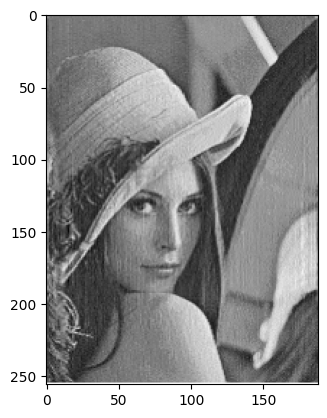

In [ ]:
A2 = CalculateOperator(X, Y, PseudoInverseMatrix_Greville, eps=1e-6, delta=0.0001)

Y2 = ApplyOperator(X, A2)
ShowImage(Y2)

In [ ]:
def CalculateError1(Y, Y_expected):
    return np.linalg.norm(Y - Y_expected, ord=1)

def CalculateError2(Y, Y_expected):
    return np.linalg.norm(Y - Y_expected, ord=1) / np.linalg.norm(Y_expected, ord=1)

def CalculateError3(Y, Y_expected):
    return np.linalg.norm(Y - Y_expected, ord=1) / np.linalg.norm(Y, ord=1)

def distance(m1, m2):
    return np.sqrt(np.sum((m1 - m2) ** 2))

def calculate_error(true_matrix, predicted_matrix):
    # Calculate the Mean Squared Error between the true matrix and the predicted matrix
    mse = np.mean((true_matrix - predicted_matrix)**2)
    rmse = np.sqrt(mse)
    return mse, rmse

print('Error 1 Moore-Penrose:', CalculateError1(Y, Y1))
print('Error 1 Greville:', CalculateError1(Y, Y2))

print('Error 2 Moore-Penrose:', CalculateError2(Y, Y1))
print('Error 2 Greville:', CalculateError2(Y, Y2))

print('Error 3 Moore-Penrose:', CalculateError3(Y, Y1))
print('Error 3 Greville:', CalculateError3(Y, Y2))

print('Distance Moore-Penrose:', distance(Y, Y1))
print('Distance Greville:', distance(Y, Y2))

print('MSE, RMSE Moore-Penrose:', calculate_error(Y, Y1))
print('MSE, RMSE Greville:', calculate_error(Y, Y2))

Error 1 Moore-Penrose: 8668.566993138305
Error 1 Greville: 8668.566987237118
Error 2 Moore-Penrose: 0.23282405868400882
Error 2 Greville: 0.2328240490088254
Error 3 Moore-Penrose: 0.2336415016208912
Error 3 Greville: 0.23364150146183812
Distance Moore-Penrose: 2088.4809586671763
Distance Greville: 2088.480958667341
MSE, RMSE Moore-Penrose: (90.62817309498355, 9.51988303998445)
MSE, RMSE Greville: (90.62817309499783, 9.5198830399852)
